/tmp/ipykernel_9077/3598144265.py:39: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update_plot, interval=100)


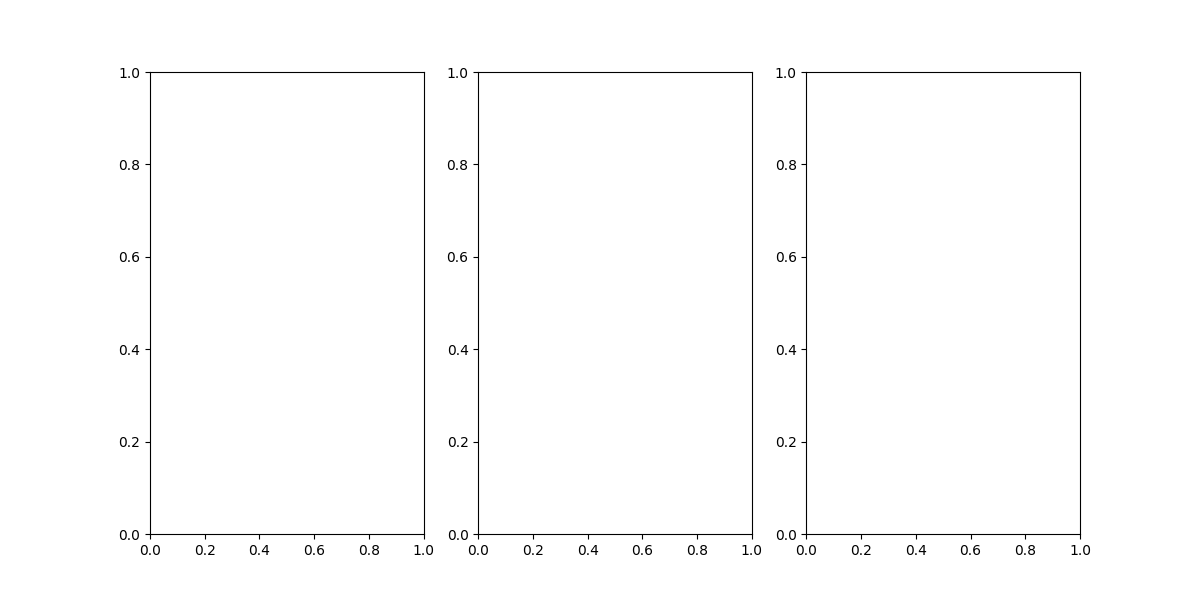

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os
import subprocess

%matplotlib widget
config_path = 'config.json'
output_path = 'coords.xyz'
distribution_path = 'distribution.txt'
energy_path = 'energy.txt'

subprocess.Popen(['build/main', config_path, output_path, distribution_path, energy_path])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

def update_plot(i):
    with open(distribution_path, 'r') as f:
        lines = f.readlines()
        Ts = [np.mean([float(_)**2 for _ in line.split()]) for line in lines]

        x = [float(_) for _ in lines[-1].split()]
        mean_x = np.mean(x)
    
    axs[0].cla()
    axs[0].plot(range(len(Ts)), Ts, color='black')
    
    hist, bin_edges = np.histogram(x, bins=25)
    axs[1].cla()
    axs[1].stairs(hist, bin_edges, color='black')
    axs[1].axvline(mean_x)

    with open(energy_path, 'r') as f:
        energys = np.array([float(_) for _ in f.readlines()])
    axs[2].cla()
    axs[2].plot(range(len(energys)), energys / energys[0], color='black')


ani = animation.FuncAnimation(fig, update_plot, interval=100)
plt.show()

In [ ]:
{
    "molecule_mass": 1,
    "eps": 0.01,
    "sigma": 0.1,
    "init_velocity": 0.25,
    "env_size": 1,
    "molecules_count": 216,
    "seed": 42,
    "max_step_count": 2000,
    "save_period": 5,
    "dt": 0.005,
    "grid_init_mode": true
}

In [ ]:
{
    "molecule_mass": 1,
    "eps": 0.01,
    "sigma": 0.1,
    "init_velocity": 0,
    "env_size": 1,
    "molecules_count": 217,
    "seed": 42,
    "max_step_count": 2000,
    "save_period": 5,
    "dt": 0.01,
    "grid_init_mode": true
}